Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

User demographic information
Browsing behavior
Historical purchase data among other information
It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

## Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
PATH = "/content/drive/MyDrive/HomeWork-churn_rate_prediction.csv" # Path to your file

df = pd.read_csv(PATH)
df.head()
#ToDo: Show histogram of dataframe

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


## Data Analysis

In [ ]:
# Data analysis
# Todo: analyze your data here
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [ ]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'days_since_last_login'}>],
       [<Axes: title={'center': 'avg_time_spent'}>,
        <Axes: title={'center': 'avg_transaction_value'}>],
       [<Axes: title={'center': 'points_in_wallet'}>,
        <Axes: title={'center': 'churn_risk_score'}>]], dtype=object)

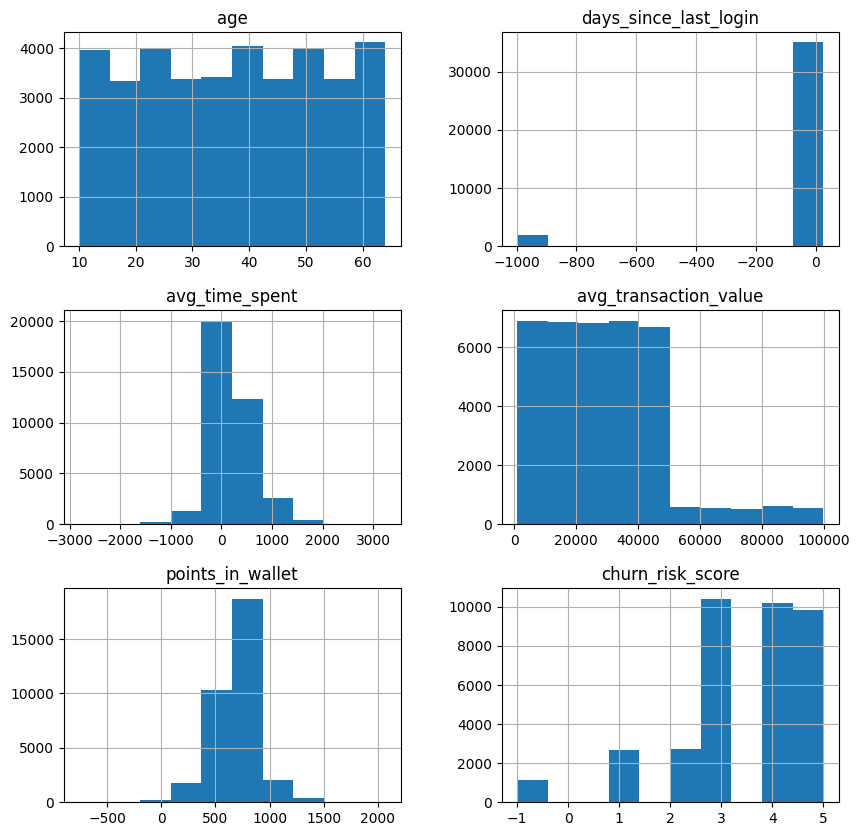

In [ ]:
df.hist(figsize = (10, 10))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [ ]:
[(col, df[col].unique()) for col in df.columns]

[('customer_id',
  array(['fffe4300490044003600300030003800',
         'fffe43004900440032003100300035003700',
         'fffe4300490044003100390032003600', ...,
         'fffe4300490044003500330034003100',
         'fffe43004900440031003200390039003000',
         'fffe43004900440033003600340034003200'], dtype=object)),
 ('Name',
  array(['Pattie Morrisey', 'Traci Peery', 'Merideth Mcmeen', ...,
         'Luciana Kinch', 'Tawana Ardoin', 'Verlene Beaulieu'], dtype=object)),
 ('age',
  array([18, 32, 44, 37, 31, 13, 21, 42, 45, 25, 60, 11, 34, 40, 16, 57, 39,
         33, 30, 19, 48, 43, 29, 10, 20, 61, 17, 12, 52, 26, 49, 24, 22, 36,
         58, 41, 50, 23, 38, 35, 28, 53, 55, 59, 47, 54, 62, 51, 56, 27, 14,
         46, 15, 64, 63])),
 ('gender', array(['F', 'M', 'Unknown'], dtype=object)),
 ('security_no',
  array(['XW0DQ7H', '5K0N3X1', '1F2TCL3', ..., 'XK1IM9H', 'K6VTP1Z',
         'LBX0GLR'], dtype=object)),
 ('region_category', array(['Village', 'City', 'Town', nan], dtype=object)

**Irrelevant feature**

In [ ]:
drop_list = ['customer_id', 'Name', 'security_no', 'joining_date', 'last_visit_time']

**Invalid label**

In [ ]:
df.churn_risk_score.value_counts()

 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: churn_risk_score, dtype: int64

**Wrong type feature**

In [ ]:
df.avg_frequency_login_days

0         17.0
1         10.0
2         22.0
3          6.0
4         16.0
         ...  
36987      6.0
36988     28.0
36989    Error
36990     20.0
36991    Error
Name: avg_frequency_login_days, Length: 36992, dtype: object

**Categorical feature with few invalid records**

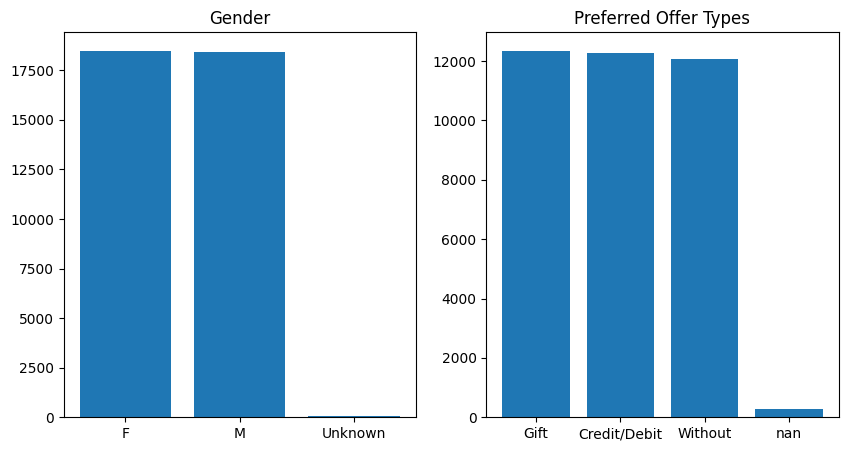

In [ ]:
_, ax = plt.subplots(1, 2, figsize = (10, 5))
gender = df.gender.value_counts(dropna = False)
label = [(str(val)).split()[0] for val in gender.index]
ax[0].bar(label, gender)
ax[0].set_title('Gender')

preferred_offer_types = df.preferred_offer_types.value_counts(dropna = False)
label = [(str(val)).split()[0] for val in preferred_offer_types.index]
ax[1].bar(label, preferred_offer_types)
ax[1].set_title('Preferred Offer Types')

plt.show()

We can drop these few invaid records.

**Categorical feature with a lot of invalid records**


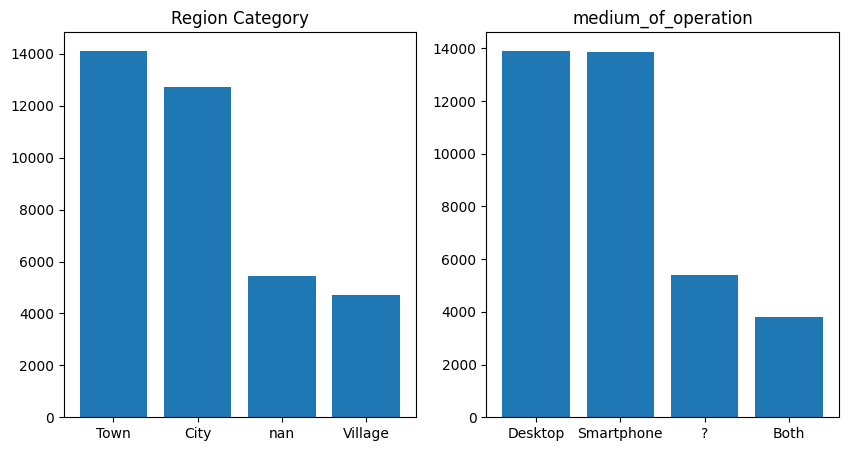

In [ ]:
_, ax = plt.subplots(1, 2, figsize = (10, 5))
region_category = df.region_category.value_counts(dropna = False)
label = [str(val) for val in region_category.index]
ax[0].bar(label, region_category)
ax[0].set_title('Region Category')

medium_of_operation = df.medium_of_operation.value_counts(dropna = False)
label = [(str(val)).split()[0] for val in medium_of_operation.index]
ax[1].bar(label, medium_of_operation)
ax[1].set_title('medium_of_operation')

plt.show()

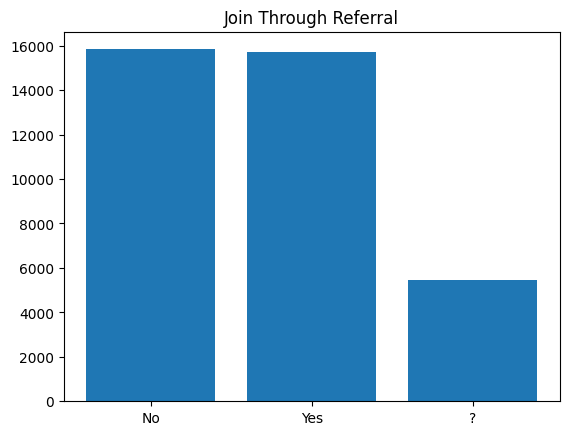

In [ ]:
joined_through_referral = df.joined_through_referral.value_counts()

plt.bar(joined_through_referral.index, joined_through_referral)
plt.title('Join Through Referral')
plt.show()

**Try to find value for ? in joined_through_referral by using referral_id**

In [ ]:
np.unique([string for string in df.referral_id if string[:3] != 'CID'])

array(['No referral', 'xxxxxxxx'], dtype='<U11')

We have two case of invalid format in referral ID

In [ ]:
data = df[df.referral_id == 'No referral']
print('All no referral records:', len(data))
print('Join through referral: Yes, Referral ID: No referral ->', len(data[data.joined_through_referral == 'Yes']))
print('Join through referral: No, Referral ID: No referral ->', len(data[data.joined_through_referral == 'No']))
print('Join through referral: ?, Referral ID: No referral ->', len(data[data.joined_through_referral == '?']))

All no referral records: 5
Join through referral: Yes, Referral ID: No referral -> 4
Join through referral: No, Referral ID: No referral -> 0
Join through referral: ?, Referral ID: No referral -> 1


Without context, the 4 records above seem abnormal in the logical way. But still we can assume it is correct and try replacing ? with Yes.

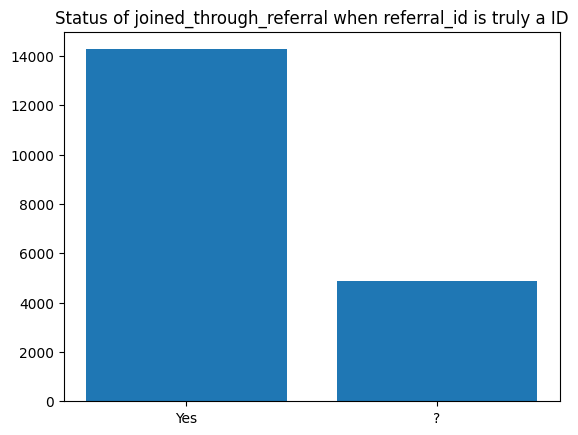

In [ ]:
data = df[df.referral_id != 'No referral']
data = data[data.referral_id != 'xxxxxxxx']
joined_through_referral = data.joined_through_referral.value_counts()

plt.bar(joined_through_referral.index, joined_through_referral)
plt.title('Status of joined_through_referral when referral_id is truly a ID')
plt.show()

The graph says that when referral_id is truly a ID, joined_through_referral have no record of No and it even make sense in real life. We can try replacing ? with Yes when referral_id is a ID.

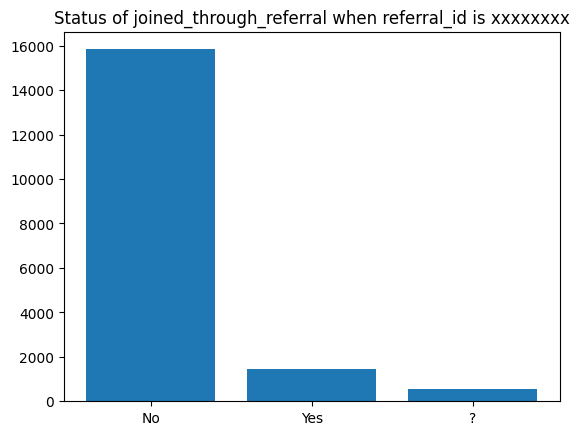

In [ ]:
data = df[df.referral_id == 'xxxxxxxx']
joined_through_referral = data.joined_through_referral.value_counts()

plt.bar(joined_through_referral.index, joined_through_referral)
plt.title('Status of joined_through_referral when referral_id is xxxxxxxx')
plt.show()

From this graph, we can see some customers are so lazy. Although they choose Yes for joined_through_referral, but still don't input referral_id. Luckily, the number of '?' values in this situation is not too much so we can drop these records.

**Numerical feature with invalid records**

In [ ]:
filter = df.avg_frequency_login_days == 'Error'
print('Percentage of Error values in avg_frequency_login_days: ', (filter).sum()/len(df) * 100)
print('Percentage of negative float values in avg_frequency_login_days: ', (df.avg_frequency_login_days[~filter].astype('float64') < 0).sum()/len(df) * 100)

Percentage of Error values in avg_frequency_login_days:  9.52097750865052
Percentage of negative float values in avg_frequency_login_days:  1.8463451557093427


In [ ]:
print('Percentage of Null values in points_in_wallet: ', df.points_in_wallet.isnull().sum()/len(df) * 100)
print('Percentage of negative float values in points_in_wallet: ', (df.points_in_wallet < 0).sum()/len(df) * 100)

Percentage of Null values in points_in_wallet:  9.307417820069205
Percentage of negative float values in points_in_wallet:  0.3676470588235294


In [ ]:
print('Percentage of negative float values in days_since_last_login: ', (df.days_since_last_login < 0).sum()/len(df) * 100)

Percentage of negative float values in days_since_last_login:  5.403871107266435


In [ ]:
print('Percentage of negative float values in avg_time_spent: ', (df.avg_time_spent < 0).sum()/len(df) * 100)

Percentage of negative float values in avg_time_spent:  4.646950692041522


**Discover feedback variable and churn risk score**

In [ ]:
df.feedback.value_counts()

Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: feedback, dtype: int64

We can see the feedback can group into 3 group: negative feedback, neutral feedback and positive feedback. Clearly the positive feedback is low shows that the bussiness is bad.

In [ ]:
data = df.copy()

negative = ['Poor Product Quality', 'Too many ads', 'Poor Website', 'Poor Customer Service']
neutral = ['No reason specified']
positive = ['Reasonable Price', 'User Friendly Website', 'Products always in Stock', 'Quality Customer Care']
data.feedback = data.feedback.replace(negative, 'Negative')
data.feedback = data.feedback.replace(neutral, 'Neutral')
data.feedback = data.feedback.replace(positive, 'Positive')

score = 3
data.feedback[data.churn_risk_score == score].value_counts()

Negative    8346
Neutral     2078
Name: feedback, dtype: int64

There's some relationship between two variable. When Churn Risk Score is 1 or 2, all of the feedback is Positive. On the otherhand, when Churn Risk Score is 3, 4, 5, all of the feedback is Neutral or Negative. Reduce the number of category of feedback variable from 9 to 3 may be a good thing.

**Drop irrelevant feature**

In [ ]:
df = df.drop(columns = drop_list)
df

,age,gender,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,17,300.630000,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,32,F,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.340000,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,44,F,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.160000,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,37,M,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.270000,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,31,F,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.130000,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,46,F,NaN,Basic Membership,No,xxxxxxxx,Credit/Debit Card Offers,Desktop,Wi-Fi,2,-650.682759,27277.68,6.0,639.510000,No,Yes,Yes,No Information Available,No reason specified,4
36988,29,F,Town,Basic Membership,No,xxxxxxxx,Without Offers,Smartphone,Wi-Fi,13,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5
36989,23,F,NaN,Basic Membership,Yes,CID3838,Gift Vouchers/Coupons,Desktop,Wi-Fi,12,154.940000,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,4
36990,53,M,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15,482.610000,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,3


**Feature Selection using Decision Tree**

Basis data processing on temporary data field for selecting feature

In [ ]:
def basic_preprocessing(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """

    #Drop invalid records
    df = df[df.gender != 'Unknown']
    df = df[df.preferred_offer_types.isnull() == False]

    df = df[df.region_category.isnull() == False]
    df = df[df.medium_of_operation != '?']

    df = df[df.points_in_wallet.isnull() == False]
    df = df[df.points_in_wallet >= 0]

    df = df[df.avg_frequency_login_days != 'Error']
    df.avg_frequency_login_days = df.avg_frequency_login_days.astype('float64')
    df = df[df.avg_frequency_login_days >= 0]

    df = df[df.days_since_last_login >= 0]

    df = df[df.avg_time_spent >= 0]

    df = df[df.churn_risk_score > 0]

    #Replace values
    df = df[(df.referral_id != 'xxxxxxxx') | (df.joined_through_referral != '?')]
    df.joined_through_referral[df.referral_id != 'xxxxxxxx'] = 'Yes'
    df = df.drop(columns = 'referral_id')

    #Reduce number of category
    df.feedback = df.feedback.replace(negative, 'Negative')
    df.feedback = df.feedback.replace(neutral, 'Neutral')
    df.feedback = df.feedback.replace(positive, 'Positive')

    return df

In [ ]:
temp_df = basic_preprocessing(df.copy())

In [ ]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18382 entries, 2 to 36990
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           18382 non-null  int64  
 1   gender                        18382 non-null  object 
 2   region_category               18382 non-null  object 
 3   membership_category           18382 non-null  object 
 4   joined_through_referral       18382 non-null  object 
 5   preferred_offer_types         18382 non-null  object 
 6   medium_of_operation           18382 non-null  object 
 7   internet_option               18382 non-null  object 
 8   days_since_last_login         18382 non-null  int64  
 9   avg_time_spent                18382 non-null  float64
 10  avg_transaction_value         18382 non-null  float64
 11  avg_frequency_login_days      18382 non-null  float64
 12  points_in_wallet              18382 non-null  float64
 13  u

In [ ]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data

    #Ordinal variable transform

    membership_category = ['No Membership', 'Basic Membership', 'Silver Membership', 'Gold Membership', 'Platinum Membership', 'Premium Membership']
    df.membership_category = df.membership_category.replace(membership_category, np.arange(len(membership_category))).astype('int64')

    feedback = ['Negative', 'Neutral', 'Positive']
    df.feedback = df.feedback.replace(feedback, np.arange(len(feedback))).astype('int64')

    #Other categories transform
    for col in df.columns:
      if df[col].dtype == 'object':
        df[col] = df[col].factorize()[0]

    return df

<Axes: >

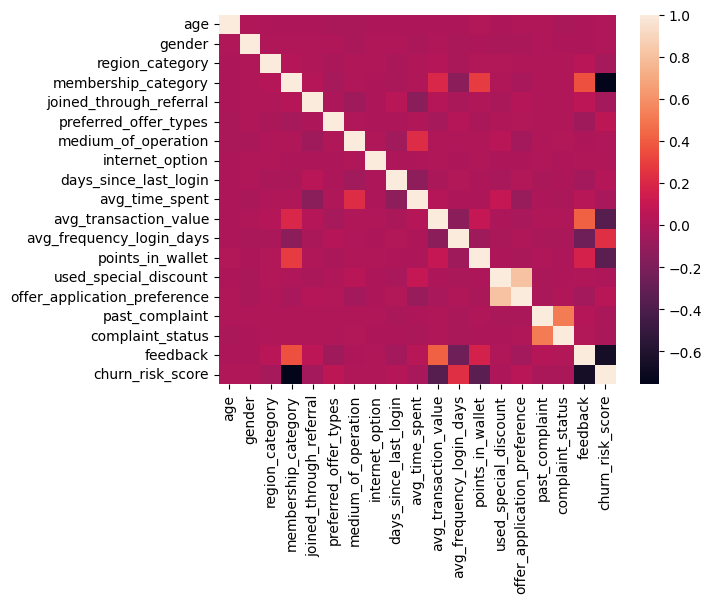

In [ ]:
temp_df = apply_feature_engineering(temp_df)
sns.heatmap(temp_df.corr())

In [ ]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    data = df.to_numpy()
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = data[:,:-1] # Todo: Select features
    y = data[:,-1] # Todo: Select label
    return X, y

In [ ]:
data, label = prepare_X_y(temp_df)
data.shape, label.shape

((18382, 18), (18382,))

**Determine what feature should be use**

Unlike Decision Tree, SVM really needs the feature selection process because it use all the input data.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
model = DecisionTreeClassifier()
model.fit(scaled_data, label)
pd.DataFrame(np.transpose( (temp_df.columns[:-1], model.feature_importances_) )).sort_values(by = 1)

,0,1
13,used_special_discount,0.002642
15,past_complaint,0.002956
4,joined_through_referral,0.003375
14,offer_application_preference,0.004308
6,medium_of_operation,0.00457
1,gender,0.005562
2,region_category,0.005605
7,internet_option,0.006656
5,preferred_offer_types,0.007498
16,complaint_status,0.008809


Eliminate feature with Decision Tree Feature Importance lower than 0.01. Almost every categorical data is not much helpful in predicting churn risk score.

In [ ]:
drop_list = ['past_complaint', 'gender', 'used_special_discount', 'joined_through_referral', 'offer_application_preference', 'internet_option', 'preferred_offer_types', 'complaint_status', 'region_category', 'medium_of_operation']
temp_df.drop(columns = drop_list, inplace = True)
temp_df

,age,membership_category,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,feedback,churn_risk_score
2,44,0,14,516.16,21027.00,22.0,500.690000,0,5
3,37,0,11,53.27,25239.56,6.0,567.660000,0,5
4,31,0,20,113.13,24483.66,16.0,663.060000,0,5
6,21,3,10,55.38,8982.50,28.0,756.210000,1,3
10,25,1,14,570.23,35119.93,8.0,699.700000,0,5
...,...,...,...,...,...,...,...,...,...
36983,45,1,9,49.33,45358.49,11.0,242.979625,0,5
36984,51,3,24,312.33,63446.71,2.0,778.700000,2,1
36985,12,5,13,418.38,56397.21,7.0,725.890000,2,2
36986,27,4,13,135.83,8225.68,16.0,748.570000,1,3


## Preprocessing

After analyzing and trying multiple ways to clean and process the data, it's time to actually do something to the real data.
Since almost every categorical (and missing values) data was in the drop list. There are only numerical data which have missing values. Predicting these values using model is complex and time-consuming due to the thing that not only 1 feature have missing values. So let's just fill invalid fields with the median of valid values of the feature.

In [ ]:
df.drop(columns = drop_list, inplace = True)
df

,age,membership_category,referral_id,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,feedback,churn_risk_score
0,18,Platinum Membership,xxxxxxxx,17,300.630000,53005.25,17.0,781.750000,Products always in Stock,2
1,32,Premium Membership,CID21329,16,306.340000,12838.38,10.0,NaN,Quality Customer Care,1
2,44,No Membership,CID12313,14,516.160000,21027.00,22.0,500.690000,Poor Website,5
3,37,No Membership,CID3793,11,53.270000,25239.56,6.0,567.660000,Poor Website,5
4,31,No Membership,xxxxxxxx,20,113.130000,24483.66,16.0,663.060000,Poor Website,5
...,...,...,...,...,...,...,...,...,...,...
36987,46,Basic Membership,xxxxxxxx,2,-650.682759,27277.68,6.0,639.510000,No reason specified,4
36988,29,Basic Membership,xxxxxxxx,13,-638.123421,11069.71,28.0,527.990000,Poor Customer Service,5
36989,23,Basic Membership,CID3838,12,154.940000,38127.56,Error,680.470000,Poor Website,4
36990,53,Platinum Membership,xxxxxxxx,15,482.610000,2378.86,20.0,197.264414,No reason specified,3


In [ ]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """

    #Fill invalid value with median of valid value

    df.points_in_wallet = np.where((df.points_in_wallet < 0) | (df.points_in_wallet.isnull() == True), np.median(temp_df.points_in_wallet.to_numpy()), df.points_in_wallet)

    df.avg_frequency_login_days = np.where((df.avg_frequency_login_days == 'Error'), np.median(temp_df.avg_frequency_login_days.to_numpy()), df.avg_frequency_login_days)
    df.avg_frequency_login_days = df.avg_frequency_login_days.astype('float64')
    df.avg_frequency_login_days = np.where(df.avg_frequency_login_days < 0, np.median(temp_df.avg_frequency_login_days.to_numpy()), df.avg_frequency_login_days)

    df.days_since_last_login = np.where(df.days_since_last_login < 0, np.median(temp_df.days_since_last_login.to_numpy()), df.days_since_last_login)

    df.avg_time_spent = np.where(df.avg_time_spent < 0, np.median(temp_df.avg_time_spent.to_numpy()), df.avg_time_spent)

    #Drop something
    df = df[df.churn_risk_score > 0]

    df = df.drop(columns = 'referral_id')

    #Reduce number of category
    df.feedback = df.feedback.replace(negative, 'Negative')
    df.feedback = df.feedback.replace(neutral, 'Neutral')
    df.feedback = df.feedback.replace(positive, 'Positive')

    return df

In [ ]:
df = preprocessing_data(df.copy())
df

,age,membership_category,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,feedback,churn_risk_score
0,18,Platinum Membership,17.0,300.63,53005.25,17.0,781.750000,Positive,2
1,32,Premium Membership,16.0,306.34,12838.38,10.0,700.240000,Positive,1
2,44,No Membership,14.0,516.16,21027.00,22.0,500.690000,Negative,5
3,37,No Membership,11.0,53.27,25239.56,6.0,567.660000,Negative,5
4,31,No Membership,20.0,113.13,24483.66,16.0,663.060000,Negative,5
...,...,...,...,...,...,...,...,...,...
36987,46,Basic Membership,2.0,174.10,27277.68,6.0,639.510000,Neutral,4
36988,29,Basic Membership,13.0,174.10,11069.71,28.0,527.990000,Negative,5
36989,23,Basic Membership,12.0,154.94,38127.56,16.0,680.470000,Negative,4
36990,53,Platinum Membership,15.0,482.61,2378.86,20.0,197.264414,Neutral,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35829 entries, 0 to 36991
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       35829 non-null  int64  
 1   membership_category       35829 non-null  object 
 2   days_since_last_login     35829 non-null  float64
 3   avg_time_spent            35829 non-null  float64
 4   avg_transaction_value     35829 non-null  float64
 5   avg_frequency_login_days  35829 non-null  float64
 6   points_in_wallet          35829 non-null  float64
 7   feedback                  35829 non-null  object 
 8   churn_risk_score          35829 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 2.7+ MB


## Feature Engineering

Use the same feature engineering function as before.

<Axes: >

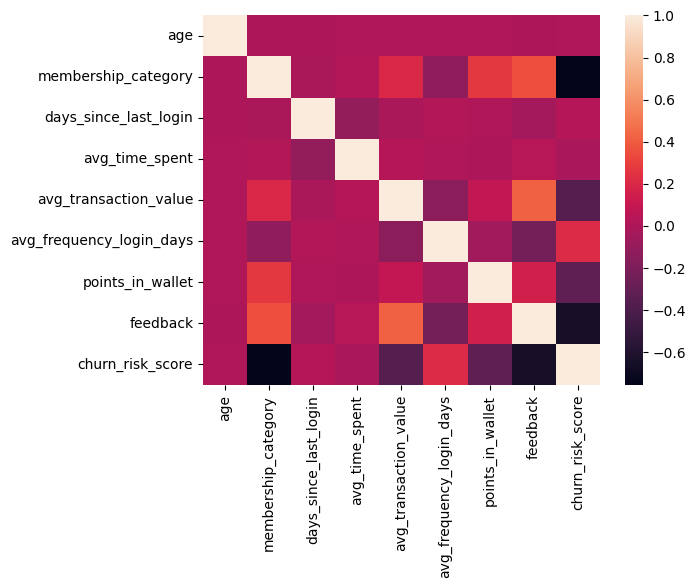

In [ ]:
df = apply_feature_engineering(df)
sns.heatmap(df.corr())

In [ ]:
X, y = prepare_X_y(df)
X.shape, y.shape

((35829, 8), (35829,))

# Apply machine learning model

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 2023
TRAIN_SIZE = 0.9

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Decision Tree

In [ ]:
# -- Build a full pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

clf = DecisionTreeClassifier()
scaler = StandardScaler()
pipe = Pipeline(steps=[("scale", scaler), ("tree", clf)]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    'tree__criterion': ["gini", "entropy", "log_loss"],
    'tree__min_samples_split': [20, 100, 500, 1000]
    }

search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(trainX, trainY)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

predicted_label = search.predict(testX)
print(classification_report(testY, predicted_label))

Best parameter (CV score=0.784):
{'tree__criterion': 'entropy', 'tree__min_samples_split': 500}
              precision    recall  f1-score   support

         1.0       0.72      0.94      0.81       266
         2.0       0.92      0.64      0.75       274
         3.0       0.92      0.90      0.91      1014
         4.0       0.70      0.66      0.68      1055
         5.0       0.74      0.80      0.77       974

    accuracy                           0.79      3583
   macro avg       0.80      0.79      0.78      3583
weighted avg       0.79      0.79      0.78      3583



Support Vector Machine

In [ ]:
# -- Build a full pipeline
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

clf = SVC()
scaler = StandardScaler()
pipe = Pipeline(steps=[("scale", scaler), ("svm", clf)]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    'svm__C': [5, 10, 20]
    }

search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(trainX, trainY)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

predicted_label = search.predict(testX)
print(classification_report(testY, predicted_label))

Best parameter (CV score=0.748):
{'svm__C': 20}
              precision    recall  f1-score   support

         1.0       0.71      0.71      0.71       266
         2.0       0.72      0.72      0.72       274
         3.0       0.88      0.89      0.88      1014
         4.0       0.73      0.42      0.54      1055
         5.0       0.65      0.94      0.77       974

    accuracy                           0.74      3583
   macro avg       0.74      0.74      0.73      3583
weighted avg       0.75      0.74      0.73      3583



In [ ]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "7. The metrics of this exercise is quite difficult to chose. "\
    "If I chose precision, it will produce more accurate in prediction, but may miss potential high churn risk score customers." \
    "If I chose recall metric, we may target some customers that is actually satisfied. If we have some programs to help customers more happy when using our services, like, giving voucher or discount, it may lead to spending too much money." \
    "But if the company aim is to satisfy customers and don't care about money or have another campain that don't cost too much, the recall will be more important. So the recall is my main metric." \
        "Other conclusion: In comparision with Decision Tree, SVM take longer time in preprocessing and training, and the accuracy is still low. I think the data would fit the Decision Tree model better in every aspect plus the explainable ability. "

**Little experiment**

What if we reduce the number of churn risk score categories from 5 to 3.

We can see the main aim is to identify unsatisfy customers. Five category seems like too much and it may confuse the model when we actually don't need that much category.

Low risk: 1, 2
Average: 3
High risk: 4, 5

The aim is to identify the high risk group of customers.

In [ ]:
new_category = [[1, 2], [3], [4, 5]]

In [ ]:
df.churn_risk_score = df.churn_risk_score.replace(new_category, [1, 2, 3])

In [ ]:
df.churn_risk_score.value_counts()

3    20012
2    10424
1     5393
Name: churn_risk_score, dtype: int64

In [ ]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    data = df.to_numpy()
    X = data[:,:-1] # Todo: Select features
    y = data[:,-1] # Todo: Select label

    return X, y

X, y = prepare_X_y(df)

In [ ]:
RANDOM_STATE = 2023
TRAIN_SIZE = 0.9

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [ ]:
# -- Build a full pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=500)
scaler = StandardScaler()
model = Pipeline(steps=[("scale", scaler), ("tree", clf)]) #Build a pipeline with a scaler and a model

model.fit(trainX, trainY)

predicted_label = model.predict(testX)
print(classification_report(testY, predicted_label))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       540
         2.0       0.92      0.90      0.91      1014
         3.0       0.95      0.96      0.96      2029

    accuracy                           0.95      3583
   macro avg       0.96      0.95      0.96      3583
weighted avg       0.95      0.95      0.95      3583



In [ ]:
# -- Build a full pipeline
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

clf = SVC(C = 20)
scaler = StandardScaler()
model = Pipeline(steps=[("scale", scaler), ("svm", clf)]) #Build a pipeline with a scaler and a model

model.fit(trainX, trainY)

predicted_label = model.predict(testX)
print(classification_report(testY, predicted_label))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       540
         2.0       0.88      0.89      0.88      1014
         3.0       0.94      0.94      0.94      2029

    accuracy                           0.93      3583
   macro avg       0.94      0.94      0.94      3583
weighted avg       0.93      0.93      0.93      3583



The accuracy is way better but still we can identify the target customers easily.